In [2]:
from matplotlib import pyplot as plt

import pandas as pd
import numpy as np

import os

# This notebook is for generatings plots

Note that right now the scenarios need to be re-run, so don't try to read too far into the plots.

- 5.1: Exploratory analysis of failures vs. ambient conditions
- 5.2: Plot parameter estimates in MCMC chains
- 5.3: [TO DO] Comparison of data-generating, empirical, and estimated parameter distributions


In [3]:
scenarios = pd.read_csv(os.path.join('inputs','scenarios.csv'), index_col='name')


# 5.1 Failures vs ambient conditions

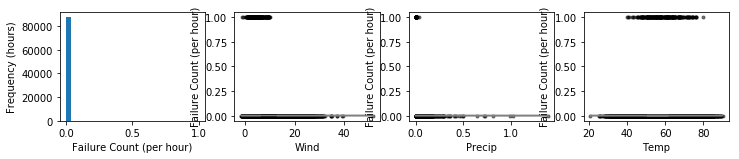

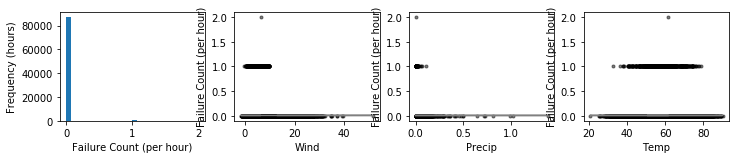

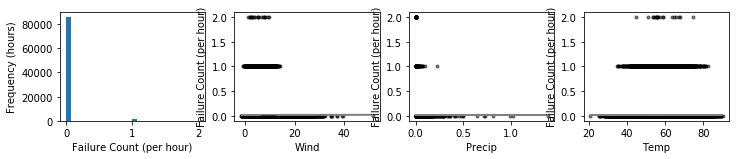

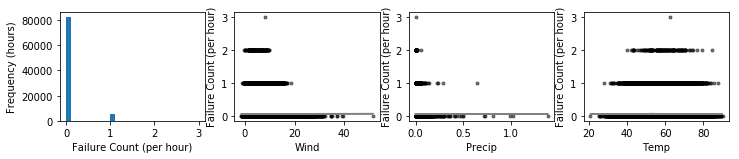

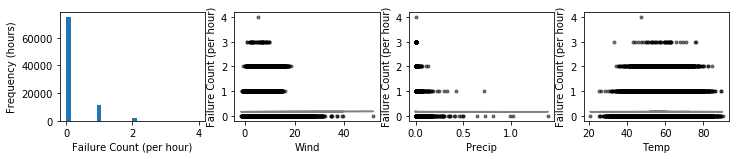

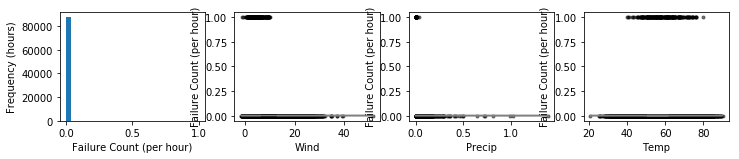

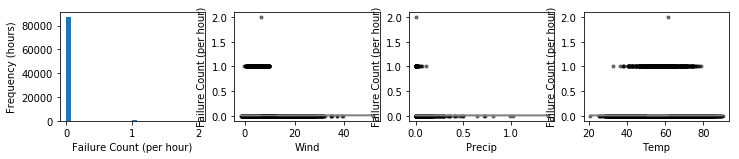

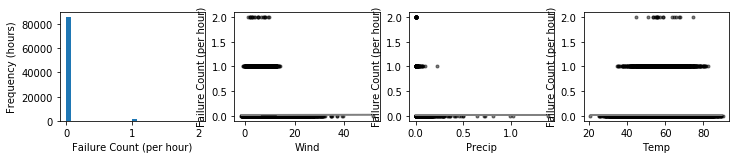

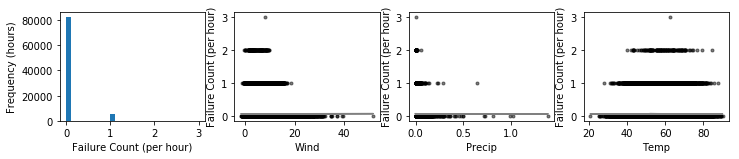

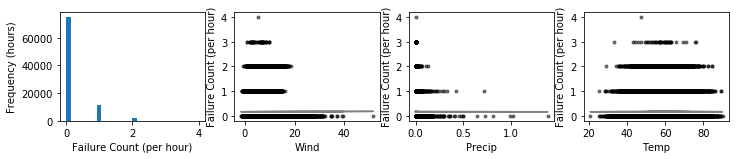

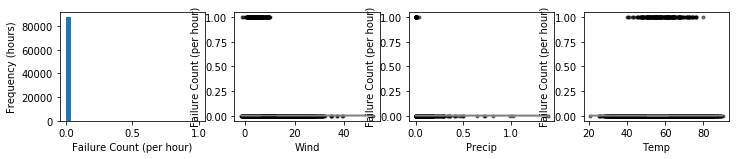

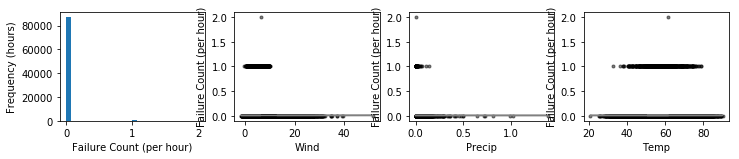

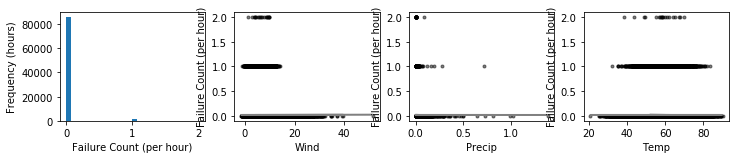

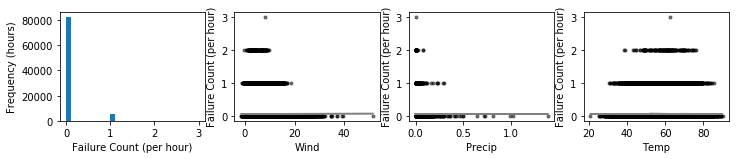

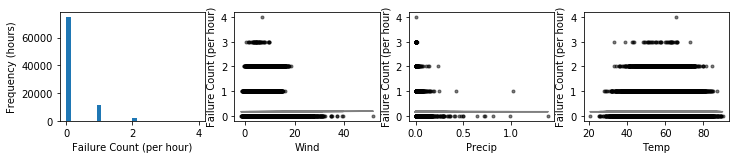

In [4]:
def make_plot(i):
    failures = pd.read_csv(os.path.join('scenarios','scenario%i'%(i),'failures.csv'), index_col='time')
    X = pd.read_csv(os.path.join('inputs/weather.csv'), index_col='time')
    
    fig, ax = plt.subplots(figsize=(12,2), ncols=4)
    ax[0].hist(failures['count'].tolist(), bins=30)
    ax[0].set_xlabel('Failure Count (per hour)')
    ax[0].set_ylabel('Frequency (hours)')
    
    for j, key in enumerate(X.keys()):
        ax[j+1].plot(X[key].tolist(), failures['count'].tolist(), ls=' ', marker='.', color='k', alpha=0.5)
        ax[j+1].set_xlabel(key.title())
        ax[j+1].set_ylabel('Failure Count (per hour)')
        
        ax[j+1].plot(X[key].tolist(), failures['rate'].tolist(), color='0.5')
    
    fig.subplots_adjust(hspace=0.2)
    fig.savefig(os.path.join('scenarios','scenario%i'%(i), 'plots','failure-EDA.png'), dpi=100)

for i in scenarios.index:
    make_plot(i)

# 5.2 Parameter estimates in MCMC chains



Index([], dtype='object')


<Figure size 504x0 with 0 Axes>



Index([u'constant', u'slope.Temp', u'slope.Wind', u'threshold.Temp',
       u'threshold.Wind'],
      dtype='object')


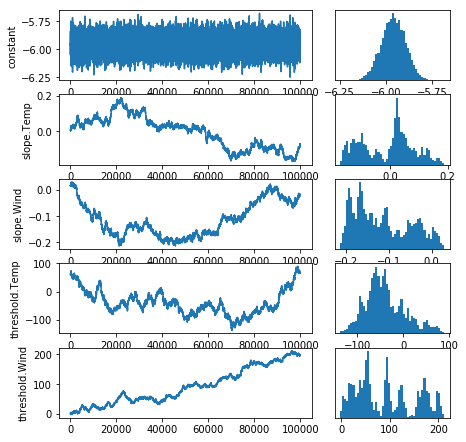



Index([u'constant', u'slope.Wind', u'threshold.Wind'], dtype='object')


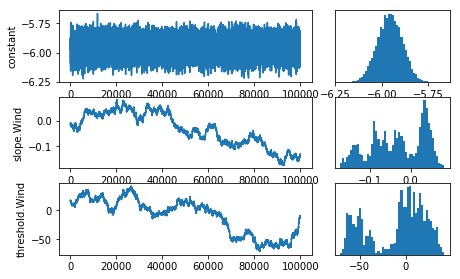



Index([u'constant'], dtype='object')


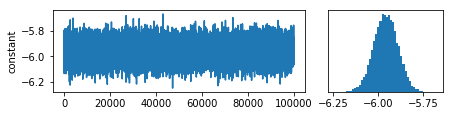

In [5]:

def make_plot(scenario, chain_name):
    params = pd.read_csv(os.path.join('scenarios', scenario, 'chains', chain_name), index_col=0)
    params = params[params.keys()[:-1]]
    
    print '\n\n', params.keys()

    n_params = len(params.keys())
    fig = plt.figure(figsize=(7,1.5*n_params))
    for i, p in enumerate(params.keys()):
        ax = plt.subplot2grid((n_params, 3), (i, 0), colspan=2)
        ax.plot(params[p].tolist())

        ax.set_ylabel(p)
#         ax.set_xticks([])
        
        ax = plt.subplot2grid((n_params, 3), (i, 2), colspan=1)
        ax.hist(params[p].tolist(), bins=50)
        
        ax.set_yticks([])
        
    plt.show()
    
for model in os.listdir(os.path.join('scenarios', 'scenario0', 'chains')):
    if 'metadata' in model:
        pass
    else:
        make_plot('scenario0', model)